# Import Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

from datasets import load_dataset
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

# Load Dataset

**Source of the Dataset:** <https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset>

In [2]:
dataset = load_dataset("maharshipandya/spotify-tracks-dataset",split = 'train')
dataset

Dataset({
    features: ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre'],
    num_rows: 114000
})

In [3]:
df = dataset.to_pandas()
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [4]:
df = df.drop(["Unnamed: 0"],axis=1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


# EDA

**Dataset Overview**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [6]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


**Number of uniques value of each column**

In [7]:
unique_counts = df.nunique()
unique_counts

track_id            89741
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

**Visualize numerical features**

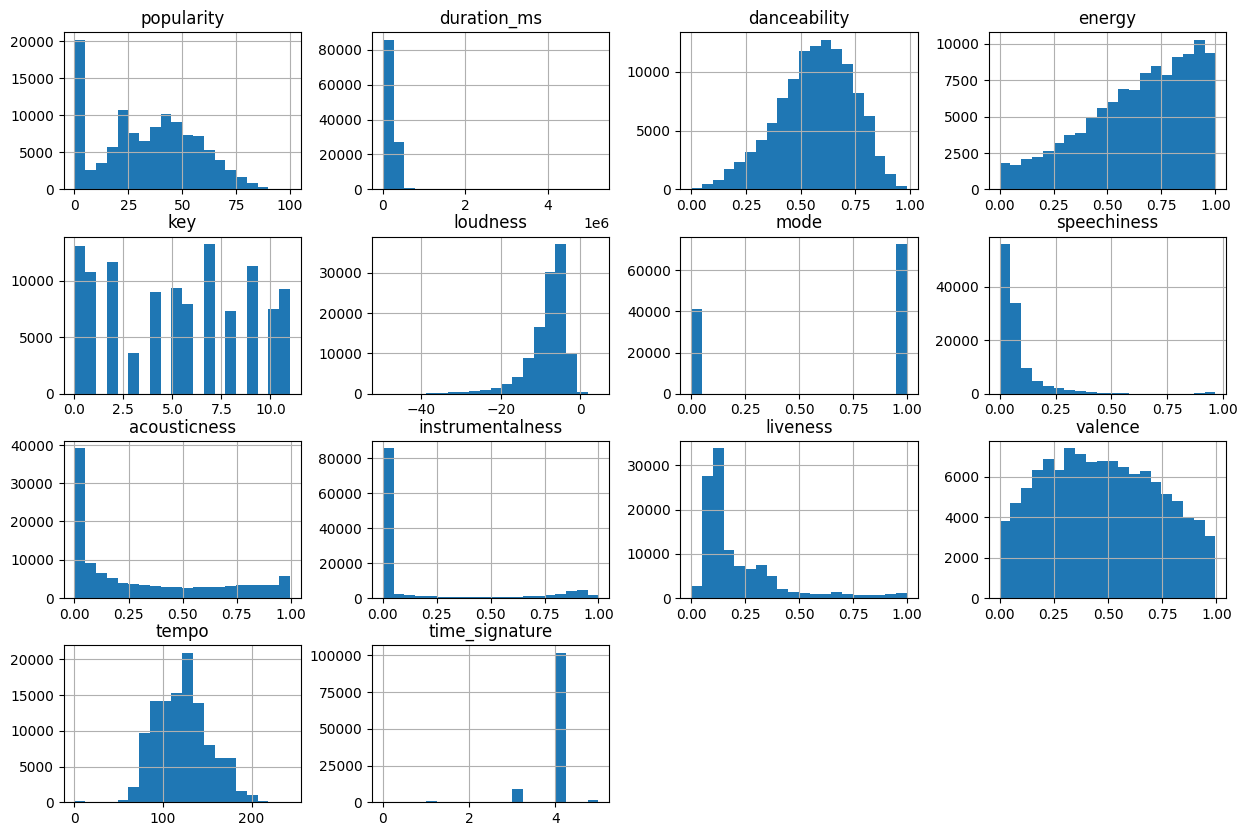

In [8]:
df.hist(bins=20, figsize=(15, 10))
plt.show()

**Genre Analysis**

In [9]:
genre_counts = df['track_genre'].value_counts()
unique_genres = df['track_genre'].nunique()



Total number of genres : 114




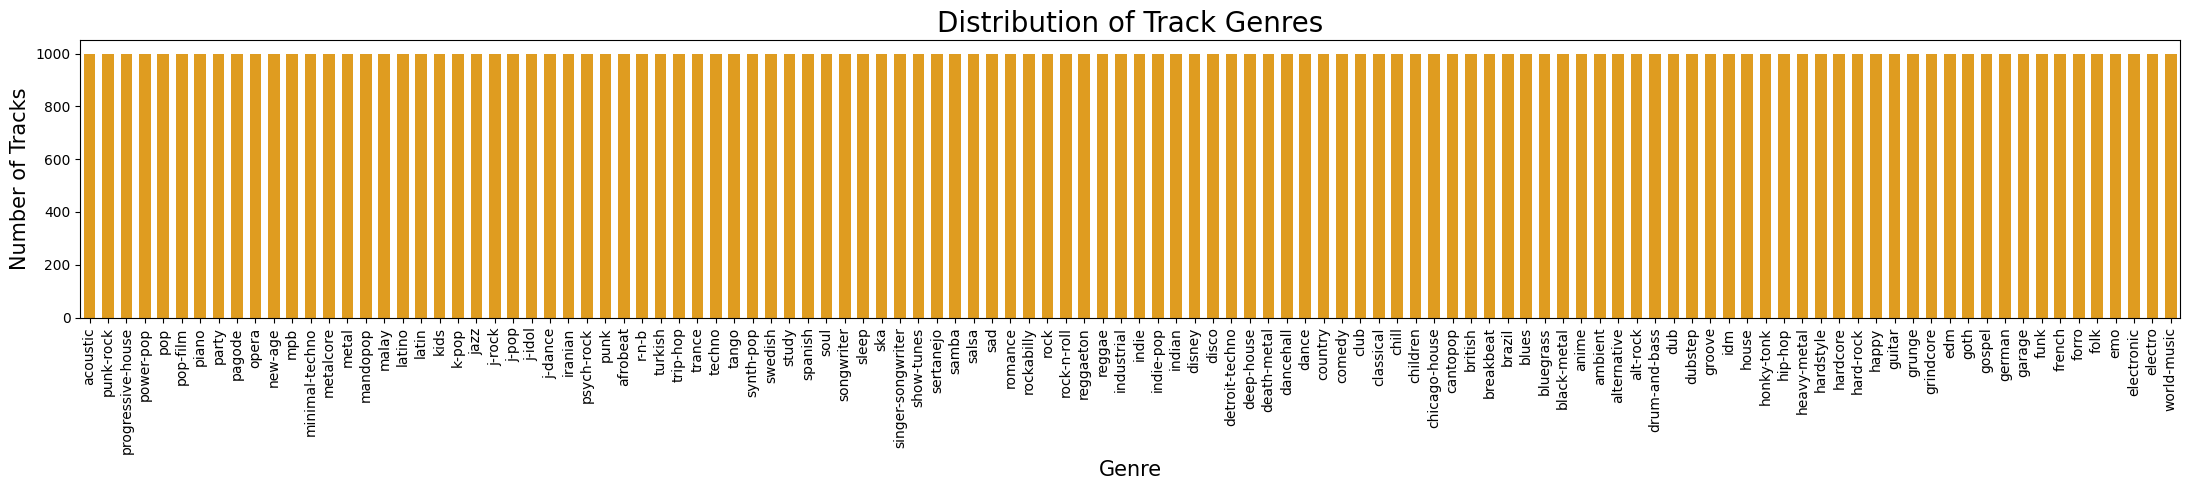

In [10]:
print("\n")
print(f"Total number of genres : {unique_genres}")
print("\n")

genre_df = genre_counts.reset_index()
genre_df.columns = ['Genre', 'Count']

plt.figure(figsize=(22, 5))
sns.barplot(data=genre_df, x='Genre', y='Count', color='orange',width=0.63)

plt.title("Distribution of Track Genres", fontsize=20)
plt.xlabel("Genre", fontsize=15)
plt.ylabel("Number of Tracks", fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Audio Features Analysis**

In [11]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'duration_ms', 'key', 'mode', 'time_signature', 'explicit']

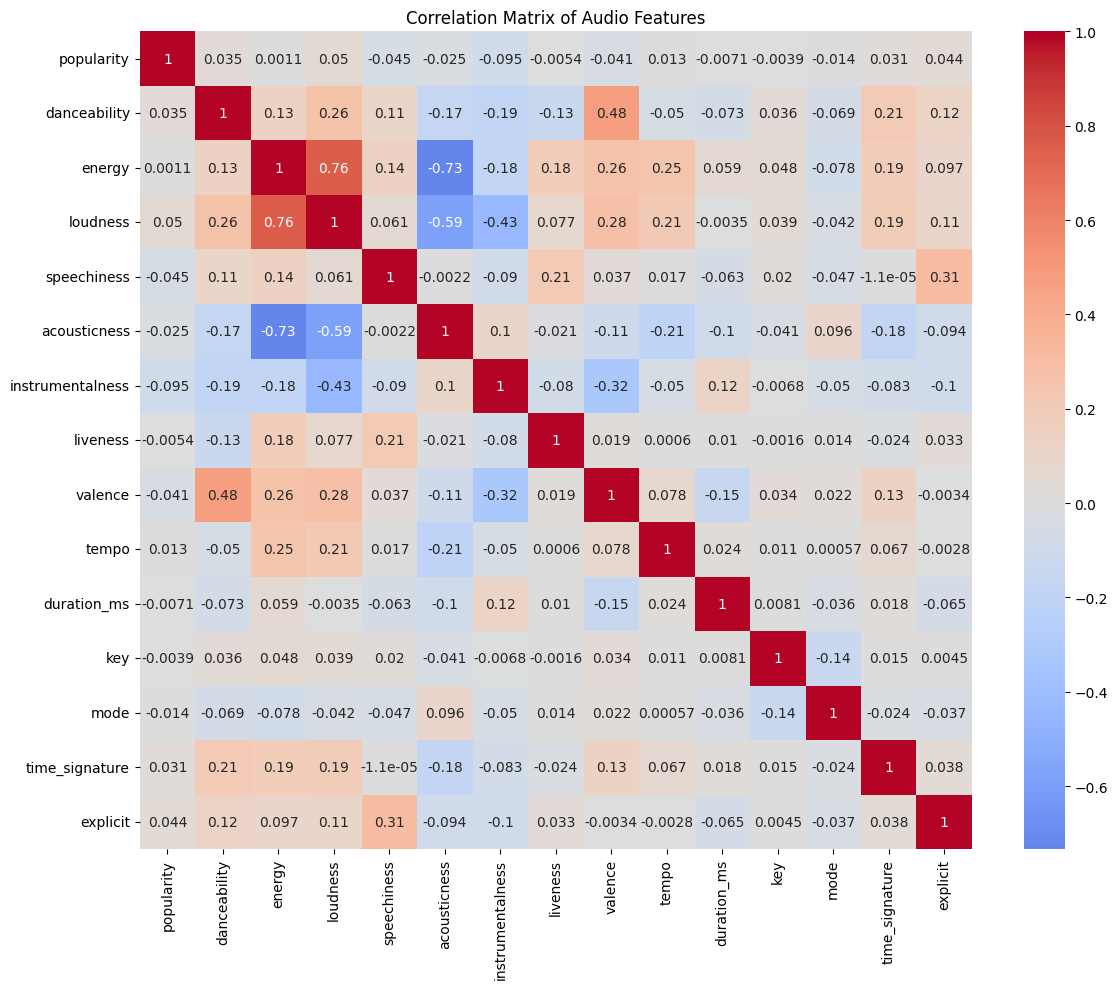

In [12]:
plt.figure(figsize=(12, 10))
correlation = df[['popularity'] + audio_features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Audio Features')
plt.tight_layout()
plt.show()

**Explicit Content Analysis**

In [13]:
# Get counts
explicit_counts = df['explicit'].value_counts()

# Convert to DataFrame
df_explicit = explicit_counts.rename(index={False: 'Non-Explicit', True: 'Explicit'}).reset_index()

# Rename columns
df_explicit.columns = ['Track Type', 'Count']


# Display without index
display(HTML(df_explicit.to_html(index=False)))

Track Type,Count
Non-Explicit,104253
Explicit,9747


In [14]:
# Proportion of explicit tracks by genre
explicit_by_genre = df.groupby('track_genre')['explicit'].mean().sort_values(ascending=False)

# Convert to DataFrame with ratio
df_explicit_by_genre = explicit_by_genre.reset_index()
df_explicit_by_genre.columns = ['Genre', 'Explicit Ratio']

In [15]:
top_10_explicit = df_explicit_by_genre.head(10)

print("Top 10 Genres by Explicit Ratio:")

# Display without index
display(HTML(top_10_explicit.to_html(index=False)))

Top 10 Genres by Explicit Ratio:


Genre,Explicit Ratio
comedy,0.656
emo,0.465
sad,0.450
j-dance,0.391
hardcore,0.325
hip-hop,0.319
funk,0.304
dancehall,0.302
metalcore,0.291
death-metal,0.251


In [16]:
top_10_non_explicit = df_explicit_by_genre.sort_values(by='Explicit Ratio', ascending=True).head(10)

print("Top 10 Non-Explicit Genres:")

# Display without index
display(HTML(top_10_non_explicit.to_html(index=False)))

Top 10 Non-Explicit Genres:


Genre,Explicit Ratio
world-music,0.000
tango,0.000
honky-tonk,0.000
study,0.000
gospel,0.000
children,0.000
sleep,0.000
classical,0.000
disney,0.001
opera,0.001


**Duration Analysis**

In [17]:
# Create duration_min column
df['duration_min'] = df['duration_ms'] / (1000 * 60)

# Get descriptive statistics as a DataFrame
duration_stats = df['duration_min'].describe().reset_index()
duration_stats.columns = ['Statistic', 'Value']


# Display without index
display(HTML(duration_stats.to_html(index=False)))

Statistic,Value
count,114000.000000
mean,3.800486
std,1.788295
min,0.000000
25%,2.901100
50%,3.548433
75%,4.358433
max,87.288250


**Key and Mode Analysis**

In [18]:
# Display without index
display(HTML(duration_stats.to_html(index=False)))

Statistic,Value
count,114000.000000
mean,3.800486
std,1.788295
min,0.000000
25%,2.901100
50%,3.548433
75%,4.358433
max,87.288250


In [19]:
# Count of each musical key, sorted by key
key_counts = df['key'].value_counts().sort_index()

# Convert to DataFrame
key_counts = key_counts.reset_index()
key_counts.columns = ['Key', 'Count']

print("Key Distribution:")

# Display without index
display(HTML(key_counts.to_html(index=False)))

Key Distribution:


Key,Count
0,13061
1,10772
2,11644
3,3570
4,9008
5,9368
6,7921
7,13245
8,7360
9,11313


In [20]:
# Count of modes
mode_counts = df['mode'].value_counts().sort_index()

# Convert to DataFrame
mode_counts = mode_counts.reset_index()
mode_counts.columns = ['Mode', 'Count']

print("Mode Distribution (0 = minor, 1 = major):")

# Display without index
display(HTML(mode_counts.to_html(index=False)))

Mode Distribution (0 = minor, 1 = major):


Mode,Count
0,41319
1,72681


**Top 10 most frequent artists**

/tmp/ipykernel_518754/2297850770.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')


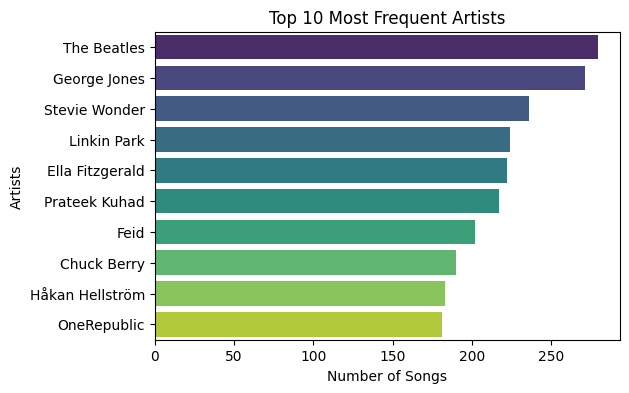

In [21]:
top_artists = df['artists'].value_counts().head(10)

# plot the top 10 artists
plt.figure(figsize=(6, 4))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Most Frequent Artists')
plt.xlabel('Number of Songs')
plt.ylabel('Artists')
plt.show()

**Popularity Analysis**

Top 10 Most Frequent Popularity Values : 
   popularity  count
0           0  16020
1          22   2354
2          21   2344
3          44   2288
4           1   2140
5          23   2117
6          20   2110
7          43   2073
8          45   2004
9          41   1996


Bottom 10 Least Frequent Popularity Values : 
     popularity  count
91           93     12
92           91     10
93           92      9
94           97      8
95           98      7
96           96      7
97           94      7
98           95      5
99          100      2
100          99      1


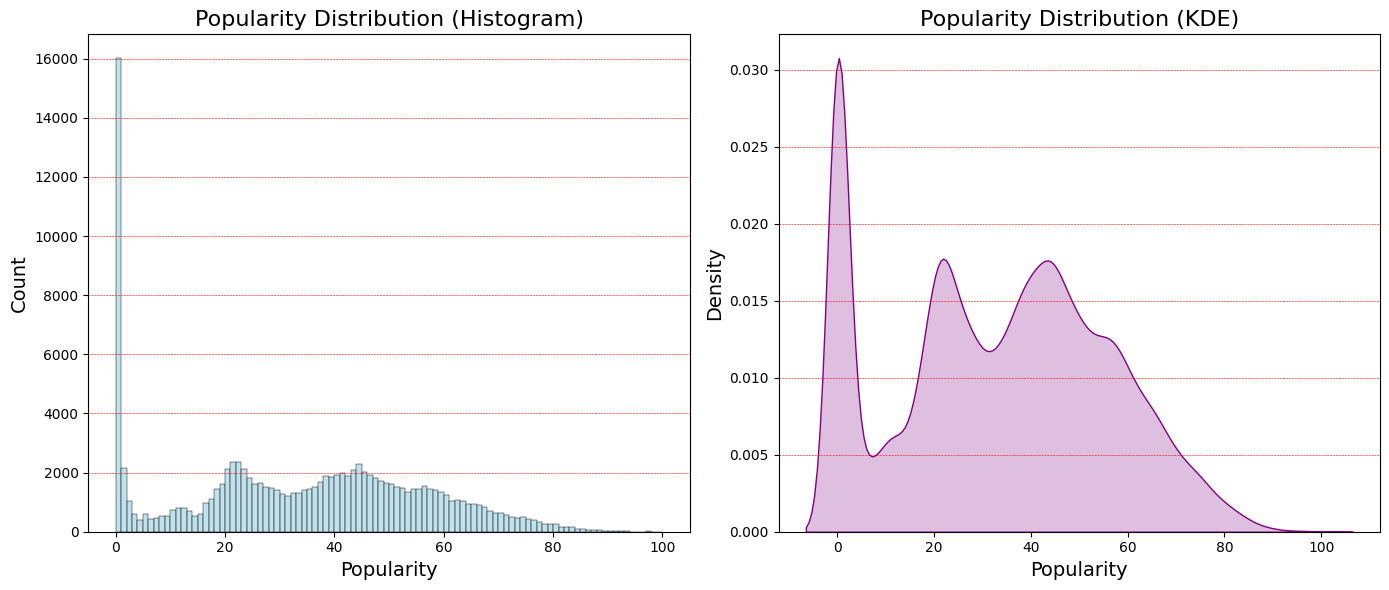

In [22]:
popularity_counts = df['popularity'].value_counts()

print("Top 10 Most Frequent Popularity Values : ")
popularity_df = df['popularity'].value_counts().reset_index()
popularity_df.columns = ['popularity', 'count']
print(popularity_df.head(10))

print("\n")

print("Bottom 10 Least Frequent Popularity Values : ")
popularity_df = df['popularity'].value_counts().reset_index()
popularity_df.columns = ['popularity', 'count']
print(popularity_df.tail(10))



# Set the plot size
plt.figure(figsize=(14, 6))

# Seaborn-style Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['popularity'], bins=100, edgecolor='black', color='lightblue')
plt.title('Popularity Distribution (Histogram)', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', color='r', linestyle='--', linewidth=0.4)

# Seaborn KDE plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['popularity'], color='purple', fill=True)
plt.title("Popularity Distribution (KDE)", fontsize=16)
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='y', color='r', linestyle='--', linewidth=0.4)

# Adjust layout
plt.tight_layout()
plt.show()



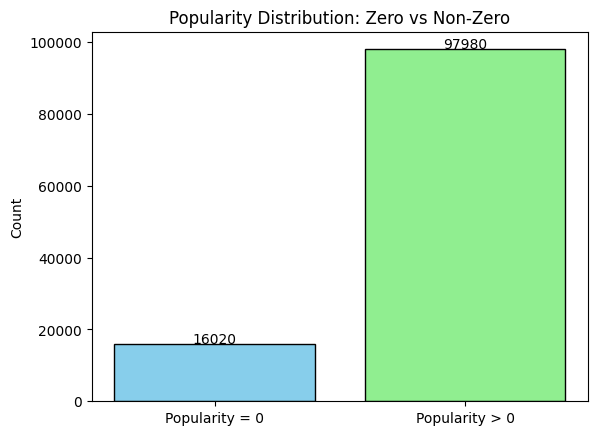

In [23]:
# Count zero and non-zero
counts = [
    (df['popularity'] == 0).sum(),
    (df['popularity'] > 0).sum()
]
labels = ['Popularity = 0', 'Popularity > 0']

# Plot
plt.bar(labels, counts, color=['skyblue', 'lightgreen'], edgecolor='black')

# Add values on top of bars
for i, v in enumerate(counts):
    plt.text(i, v + 200, str(v), ha='center', fontsize=10)

plt.title("Popularity Distribution: Zero vs Non-Zero")
plt.ylabel("Count")
plt.show()

In [24]:
# Count each popularity value
popularity_counts = df['popularity'].value_counts(normalize=True) * 100

# Sort by popularity value (optional, for better readability)
popularity_percentage = popularity_counts.sort_index()

# Display as a DataFrame
popularity_percentage_df = popularity_percentage.reset_index()
popularity_percentage_df.columns = ['Popularity', 'Percentage']

print(popularity_percentage_df)


     Popularity  Percentage
0             0   14.052632
1             1    1.877193
2             2    0.908772
3             3    0.513158
4             4    0.341228
..          ...         ...
96           96    0.006140
97           97    0.007018
98           98    0.006140
99           99    0.000877
100         100    0.001754

[101 rows x 2 columns]


**Top 10 most popular artists**

In [25]:
# Copy the original DataFrame
df_artist = df.copy()

# Split using regex: ; or , or &
df_artist['artists'] = df_artist['artists'].str.split(r'\s*[;&,&]\s*')

# Explode to separate each artist into its own row
df_artist = df_artist.explode('artists')

/tmp/ipykernel_518754/380491616.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artist_popularity, x='popularity', y='artists', palette='cubehelix')


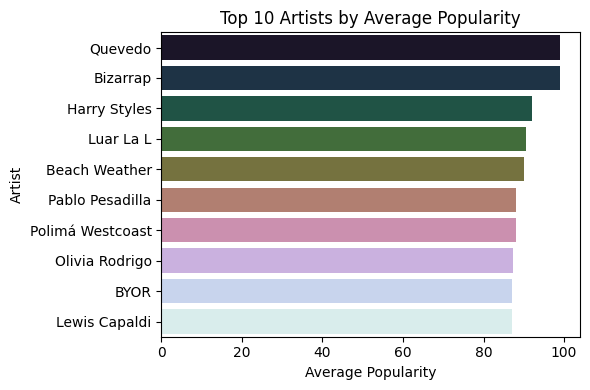

In [26]:
# Group by artist and calculate average popularity
artist_popularity = (
    df_artist.groupby('artists')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=artist_popularity, x='popularity', y='artists', palette='cubehelix')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

/tmp/ipykernel_518754/1978335851.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=artists_popularity, x='popularity', y='artists', palette='magma')


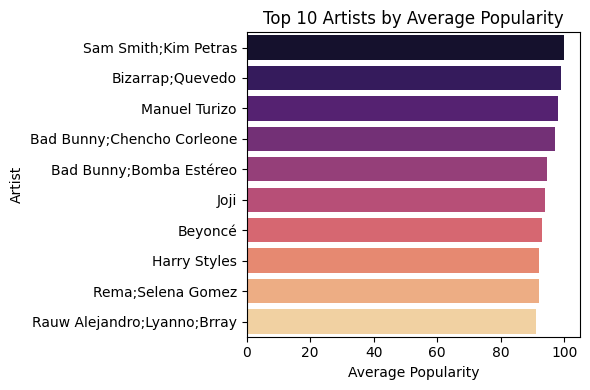

In [27]:
df_artists = df.copy()

# 2. Group by artist and calculate average popularity
artists_popularity = (
    df_artists.groupby('artists')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# 3. Plot the top 10 artists
plt.figure(figsize=(6, 4))
sns.barplot(data=artists_popularity, x='popularity', y='artists', palette='magma')
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()
plt.show()

**Top 10 most popular genres`**

/tmp/ipykernel_518754/2163457813.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_popularity.head(5), x='popularity', y='track_genre', palette='coolwarm')


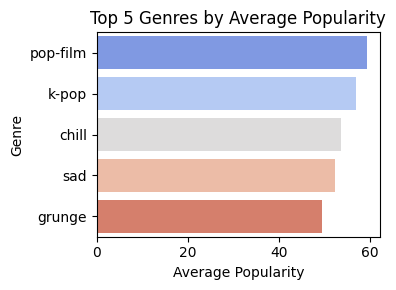

In [28]:
# Group by genre and calculate average popularity
genre_popularity = (
    df.groupby('track_genre')['popularity']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Plot top 10 genres by average popularity
plt.figure(figsize=(4, 3))
sns.barplot(data=genre_popularity.head(5), x='popularity', y='track_genre', palette='coolwarm')
plt.title('Top 5 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


In [29]:
print(f"Total number of tracks: {df['track_id'].nunique()}")
print(f"Number of unique artists: {df['artists'].nunique()}")
print(f"Number of unique albums: {df['album_name'].nunique()}")
print(f"Average popularity score: {df['popularity'].mean():.2f}")
print(f"Percentage of explicit tracks: {(df['explicit'].mean() * 100):.2f}%")
print(f"Average track duration: {df['duration_min'].mean():.2f} minutes")

Total number of tracks: 89741
Number of unique artists: 31437
Number of unique albums: 46589
Average popularity score: 33.24
Percentage of explicit tracks: 8.55%
Average track duration: 3.80 minutes


# Data Preprocessing

In [30]:
df = df.drop_duplicates()

In [31]:
df['explicit'] = df['explicit'].astype(int)

/tmp/ipykernel_518754/3983239279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['explicit'] = df['explicit'].astype(int)


#### Handling Missing Value

In [32]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
dtype: int64

In [33]:
df = df.dropna().reset_index(drop=True)

**Explanation**
As there are very few null values so, we decided to remove it.

In [34]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
dtype: int64

In [35]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
113545,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
113546,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433
113547,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550


#### **Why we didn't remove outliers for Spotify Tracks Dataset?**     

- **Real-world diversity :** Outliers could be **viral tracks**, **rare genres**, or **unusual songs** that are important for learning music trends.
- **Valuable information :** Removing outliers may cut off edge cases the model **needs to generalize** to rare or high-performing tracks.
- **Model choice matters :** Tree-based models (Random Forest, XGBoost) are **robust to outliers**, so they **don’t need clean, normal distributions** like linear models do.

### Feature Selection

**Selecting Categorical Features Based on Cardinality Ratio**

To check if a categorical feature should be used in a machine learning model, compute its **cardinality ratio**:

$$
\text{Ratio} = \frac{\text{Number of Unique Values in the Feature}}{\text{Total Number of Instances}}
$$


**What if cardinality the ratio is too high :**
1. **Large Number of Columns After Encoding**  
   - One-hot encoding a feature with thousands of unique categories generates the same number of new columns.  
   - Example: 10,000 unique values produce 10,000 additional columns, leading to a very sparse dataset.  

2. **Risk of Memorization Instead of Learning**  
   - When each category appears only once or very few times, the model tends to memorize outcomes for individual categories rather than learning general patterns.  
   - This often results in good performance on training data but poor generalization on unseen data.  

3. **High Computational Cost**  
   - A large number of features increases both memory usage and training time, making the model less efficient.  

4. **Difficulty Handling Unseen Categories**  
   - If a new category appears in the test set that was not present in the training set, the model cannot process it correctly, which can reduce prediction accuracy.  


In [36]:
categorical_features = ['artists', 'album_name', 'track_name', 'track_genre']

# Calculate the cardinality ratio for each feature
ratios = {}
for feature in categorical_features:
    unique_values = df[feature].nunique()
    total_instances = len(df)
    ratio = unique_values / total_instances
    ratios[feature] = ratio

# Display the ratios
print("Cardinality Ratios:")
for feature, ratio in ratios.items():
    print(f"{feature}: {ratio:.2f}")

# Conclusion based on the ratio
print("\nConclusion:")
for feature, ratio in ratios.items():
    if ratio > 0.2:  # Threshold for high cardinality
        print(f"Feature '{feature}' has a high cardinality ratio ({ratio:.2f}). Consider ignoring or transforming it.")
    else:
        print(f"Feature '{feature}' has a low cardinality ratio ({ratio:.2f}). It can be used for training.")

Cardinality Ratios:
artists: 0.28
album_name: 0.41
track_name: 0.65
track_genre: 0.00

Conclusion:
Feature 'artists' has a high cardinality ratio (0.28). Consider ignoring or transforming it.
Feature 'album_name' has a high cardinality ratio (0.41). Consider ignoring or transforming it.
Feature 'track_name' has a high cardinality ratio (0.65). Consider ignoring or transforming it.
Feature 'track_genre' has a low cardinality ratio (0.00). It can be used for training.


### Encoding

In [37]:
len(df['track_genre'].unique())

114

#### **Why We Are Not Using Label Encoding or One-Hot Encoding for `track_genre`** 

#### Problem Context:
The feature `track_genre` is categorical and non-ordinal, meaning the genres do not have a natural order or hierarchy.

---

####  **Limitations of Label Encoding**  
   - **What it Does**: Label Encoding assigns a unique integer to each category, such as Rock = 0, Pop = 1, Jazz = 2, etc.
   - **Why It’s Inappropriate for `track_genre`:**
     - **Artificial Ordinality**: The numerical encoding creates an implied order among the genres (e.g., Jazz > Pop > Rock), which is incorrect since genres are categorical and do not have any inherent ranking.
     - **Model Misinterpretation**: Models like regression or tree-based methods may misinterpret the numeric labels as meaningful distances or hierarchies, leading to biased predictions.

---

#### **Limitations of One-Hot Encoding**  
   - **What it Does**: One-Hot Encoding converts each category into a separate binary column. For instance, the dataset with 114 unique genres results in 114 additional features.
   - **Why It’s Inappropriate for `track_genre`:**
     - **Curse of Dimensionality**: Adding too many features significantly increases the dataset’s dimensionality, which:
       - Makes training computationally expensive.
       - Increases the risk of overfitting, especially if the dataset does not have enough samples relative to the number of features.
     - **Sparse Data**: The resulting matrix is sparse (mostly filled with zeros), which can be inefficient for both memory usage and computation.

---

#### Why Target Encoding is More Suitable
   - **What it Does**: Target Encoding replaces each category with a statistic of the target variable (e.g., mean popularity) for that category. For example:
     - If Rock tracks have an average popularity of 70, Pop tracks 80, and Jazz tracks 60, these values will replace the respective genres.
   - **Advantages Over Label and One-Hot Encoding**:
     - **Captures Relationships**: Target encoding reflects the relationship between `track_genre` and the target variable (`popularity`) instead of assigning arbitrary or binary values.
     - **Maintains Dataset Size**: Unlike one-hot encoding, target encoding keeps `track_genre` as a single column, reducing feature space and avoiding sparsity.
     - **No Imposed Ordinality**: It does not impose an artificial order on the categories, making it appropriate for non-ordinal features.

---

#### Considerations for Target Encoding
   - **Check Correlation**: Before applying target encoding, evaluate the correlation between `track_genre` and `popularity` to ensure it captures meaningful information.

---

We are not using label encoding or one-hot encoding for `track_genre` because:
1. Label encoding introduces artificial ordinal relationships.
2. One-hot encoding increases dimensionality, leading to computational inefficiency and a risk of overfitting.

Instead, target encoding is a better choice as it effectively captures the relationship between `track_genre` and `popularity` without increasing dimensionality or imposing order.

In [38]:
genre_means = df.groupby('track_genre')['popularity'].mean()
df['track_genre_encoded'] = df['track_genre'].map(genre_means)

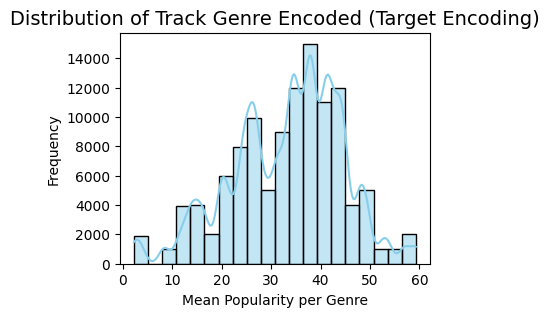

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of target-encoded genre values
plt.figure(figsize=(4,3))
sns.histplot(df['track_genre_encoded'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title("Distribution of Track Genre Encoded (Target Encoding)", fontsize=14)
plt.xlabel("Mean Popularity per Genre")
plt.ylabel("Frequency")
plt.show()


In [40]:
correlation = df['track_genre_encoded'].corr(df['popularity'])
print(f"Correlation: {correlation}")

Correlation: 0.5020345001224186


---------------------------------
Since the correlation between `track_genre` and `popularity` is 0.5, which is significantly higher than 0.3, target encoding is well-suited for this problem. The strong correlation indicates that `track_genre` provides meaningful information about `popularity`, and target encoding effectively captures this relationship without increasing dimensionality or imposing artificial order.

-------------------------------
### Spliting the Dataset

In [41]:
X = df.drop(['popularity','track_id','artists','album_name','track_name','track_genre','duration_min'],axis=1)
y = df['popularity']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_encoded
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,42.483000
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,42.483000
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,42.483000
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,42.483000
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,42.483000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,41.880881
113545,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,41.880881
113546,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,41.880881
113547,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,41.880881


### Scaling

In [44]:
features_1 = ['duration_ms', 'danceability', 'energy', 'track_genre_encoded', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                      'valence', 'tempo']

feature_2 = ['key','time_signature']

In [45]:
scaler = StandardScaler()
X_train[features_1] = scaler.fit_transform(X_train[features_1])
X_test[features_1] = scaler.transform(X_test[features_1])

min_max_scaler = MinMaxScaler()
X_train[feature_2] = min_max_scaler.fit_transform(X_train[feature_2])
X_test[feature_2] = min_max_scaler.transform(X_test[feature_2])

In [46]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre_encoded
110090,-0.268535,0,1.371207,-0.435791,0.818182,0.516566,1,-0.459034,-0.862189,-0.316604,-0.056770,0.281930,0.360095,0.8,0.384316
15917,-0.639862,0,2.276735,-1.503688,1.000000,-0.595522,0,-0.050429,0.636889,-0.474906,-0.565020,-0.593871,-0.072040,0.8,1.821692
101181,-1.115204,0,-0.416778,-2.305805,0.090909,-4.140377,1,-0.177530,1.736937,2.228651,-0.797138,-1.475846,-0.402793,1.0,0.154806
66950,-0.209967,1,0.886721,0.285437,1.000000,0.560922,0,1.403225,-0.622891,-0.503488,1.824279,0.123746,-0.939345,0.8,-2.234312
22708,0.024577,0,-0.993547,1.030574,0.000000,0.538744,1,-0.431731,-0.945358,2.338584,-0.798186,-0.451119,-1.055764,0.8,-0.103883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,3.942120,0,-0.295656,0.516549,0.545455,0.521361,0,-0.414784,0.401810,-0.503488,1.777122,0.378384,1.262539,0.8,0.980211
110268,0.049878,0,-0.064948,0.847279,0.545455,-0.134383,1,-0.147402,-0.904082,0.540868,-0.062010,-1.622456,0.060381,0.8,0.384316
103694,-0.155616,0,0.194598,-0.423837,0.000000,0.378504,1,-0.426082,0.787581,-0.503488,-0.234919,-0.481985,0.505952,0.6,0.409844
860,-0.106018,0,-0.843587,-2.133268,0.545455,-1.388129,1,-0.484454,1.911739,-0.503488,-0.658810,-1.373219,-0.598758,0.8,0.817850


-----------------------------
## Model Training
-----------------------------

In [47]:
# ---- Classifiers (zero vs non-zero) ----
classifiers = {
    "Logistic": LogisticRegression(class_weight="balanced"), 
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced"),
    "RandomForest": RandomForestClassifier(class_weight="balanced"),
    "GradientBoosting": GradientBoostingClassifier(), 
    "XGBoost": xgb.XGBClassifier(scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train>0]))),
    "SVM": SVC(probability=True, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),   
    "NaiveBayes": GaussianNB()      
}
# ---- Regressors (predicting non-zero values) ----
regressors = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror"),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

In [48]:
results = {}

for clf_name, clf in classifiers.items():
    # Stage 1: Classification (zero vs >0)
    binary_y_train = (y_train > 0).astype(int)
    clf.fit(X_train, binary_y_train)

    probas_train = clf.predict_proba(X_train)[:, 1]
    probas_test = clf.predict_proba(X_test)[:, 1]

    # Mask for positive cases
    positive_mask = y_train > 0

    # Train on positive cases only
    X_positive = np.column_stack((X_train[positive_mask], probas_train[positive_mask]))
    y_positive = y_train[positive_mask]

    for reg_name, reg in regressors.items():
        reg.fit(X_positive, y_positive)

        # Training predictions
        X_train_with_proba = np.column_stack((X_train, probas_train))
        reg_preds_train = reg.predict(X_train_with_proba)
        final_preds_train = reg_preds_train * probas_train

        train_mae = mean_absolute_error(y_train, final_preds_train)
        train_mse = mean_squared_error(y_train, final_preds_train)
        train_r2 = r2_score(y_train, final_preds_train)

        # Testing predictions
        X_test_with_proba = np.column_stack((X_test, probas_test))
        reg_preds_test = reg.predict(X_test_with_proba)
        final_preds_test = reg_preds_test * probas_test

        test_mae = mean_absolute_error(y_test, final_preds_test)
        test_mse = mean_squared_error(y_test, final_preds_test)
        test_r2 = r2_score(y_test, final_preds_test)

        # Store results
        key = f"{clf_name} + {reg_name}"
        results[key] = {
            "train": {"MAE": train_mae, "MSE": train_mse, "R2": train_r2},
            "test": {"MAE": test_mae, "MSE": test_mse, "R2": test_r2},
        }


#ADD THIS PART AFTER THE LOOP
import pandas as pd

rows = []
for model, metrics in results.items():
    row = {
        "Model": model,
        "Train_MAE": metrics["train"]["MAE"],
        "Train_MSE": metrics["train"]["MSE"],
        "Train_R2":  metrics["train"]["R2"],
        "Test_MAE":  metrics["test"]["MAE"],
        "Test_MSE":  metrics["test"]["MSE"],
        "Test_R2":   metrics["test"]["R2"],
    }
    rows.append(row)

df_results = pd.DataFrame(rows).sort_values(by="Test_MAE").reset_index(drop=True)

In [49]:
df_results

,Model,Train_MAE,Train_MSE,Train_R2,Test_MAE,Test_MSE,Test_R2
0,RandomForest + RandomForest,3.708742,42.087249,0.915027,10.029521,239.807563,0.521928
1,RandomForest + XGBoost,7.668111,129.275067,0.738998,10.381850,245.640763,0.510299
2,RandomForest + GradientBoosting,9.524194,190.164573,0.616064,11.347303,269.547679,0.462639
3,RandomForest + SVR,9.766861,224.261838,0.547223,11.354706,297.344297,0.407225
4,DecisionTree + RandomForest,3.173109,37.110402,0.925075,11.415370,359.370662,0.283571
...,...,...,...,...,...,...,...
67,Logistic + Linear,17.791274,514.265630,-0.038286,17.923108,523.579022,-0.043789
68,Logistic + Lasso,17.870574,522.325554,-0.054558,18.003330,531.742224,-0.060063
69,Logistic + GradientBoosting,18.002983,508.498986,-0.026643,18.149023,518.543683,-0.033751
70,Logistic + DecisionTree,16.033991,369.852920,0.253279,18.229528,543.294242,-0.083093


In [50]:
# Sort by Test_R2 in descending order and take top 15
top15 = df_results.sort_values(by="Test_R2", ascending=False).head(15)

# Show them
print(top15)

                              Model  Train_MAE   Train_MSE  Train_R2  \
0       RandomForest + RandomForest   3.708742   42.087249  0.915027   
1            RandomForest + XGBoost   7.668111  129.275067  0.738998   
2   RandomForest + GradientBoosting   9.524194  190.164573  0.616064   
5                RandomForest + KNN   8.428189  147.750562  0.701696   
9              RandomForest + Ridge  10.546885  222.539306  0.550700   
8             RandomForest + Linear  10.546762  222.541073  0.550697   
12             RandomForest + Lasso  11.062308  229.712173  0.536219   
3                RandomForest + SVR   9.766861  224.261838  0.547223   
6                KNN + RandomForest   6.428607  120.929967  0.755846   
10                    KNN + XGBoost  10.305981  214.591681  0.566746   
21           KNN + GradientBoosting  11.994149  271.505410  0.451839   
14  GradientBoosting + RandomForest   8.659922  195.269265  0.605758   
19                        KNN + KNN  10.348803  217.175606  0.56